# Project Two
Jerome Fleischman, Daniel Portuondo, Isaac Attuah

Our goal for this project is to explore the formation of different decision trees from various subets within three domains from the UCI repository. This program will utilize the J48 Weka program
The domains that will be explored are:
* Congressional Voting
* Mushrooms
* Dry Bean

## Congressional Voting

### Import Libraries

In [54]:
# Install JVM
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

#Install Weka Wrapper
import sys
!{sys.executable} -m pip install python-weka-wrapper3

#Import Weka
import weka.core.jvm as jvm
import weka.core.converters as conv
from weka.classifiers import Evaluation, Classifier
from weka.core.classes import Random

#Import Timer
import time

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


### Load Data

In [ ]:
# start jvm
jvm.start(packages=True)

data = conv.load_any_file(os.environ.get("JAVA_HOME")+os.sep+"house-votes-84.csv")
data.class_is_first() #class location

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


### Configure Decision Tree Classifier

In [ ]:
# configure classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])

# cross-validate classifier

evl = Evaluation(data)
evl.crossvalidate_model(cls, data, 10, Random(1))


# output statistics
print(evl.summary("=== J48 on House Votes (stats) ===", False))
print(evl.matrix("=== J48 on House Votes (confusion matrix) ==="))
#print(evl.percent_correct)
#print(evl.percent_incorrect)

=== J48 on House Votes (stats) ===
Correctly Classified Instances         419               96.3218 %
Incorrectly Classified Instances        16                3.6782 %
Kappa statistic                          0.9224
Mean absolute error                      0.0611
Root mean squared error                  0.1748
Relative absolute error                 12.887  %
Root relative squared error             35.9085 %
Total Number of Instances              435     

=== J48 on House Votes (confusion matrix) ===
   a   b   <-- classified as
 160   8 |   a = republican
   8 259 |   b = democrat



### Configure Decision Tree Classifier on Subsets

In [ ]:
# generate subsets
num_of_instances = data.num_instances
num_of_subsets = 10
subset_accuracy_rates = []
subset_error_rates = []
induction_times = []
examples = []

for i in range(1,num_of_subsets + 1):
  subset_val = int((i/num_of_subsets) * num_of_instances)
  examples.append(subset_val)
  x = data.subset(row_range='first-%s'%subset_val)


  # configure classifier
  cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])

  # cross-validate classifier
  tic = time.perf_counter()
  evl = Evaluation(x)
  evl.crossvalidate_model(cls, x, 10, Random(1))
  tic = time.perf_counter() - tic

  # append subests and induction times
  subset_accuracy_rates.append(float(evl.percent_correct))
  subset_error_rates.append(float(evl.percent_incorrect))
  induction_times.append(tic)

  
print(subset_accuracy_rates)
print(subset_error_rates)
print(induction_times)
print(examples)

[97.67441860465117, 94.25287356321839, 96.15384615384616, 97.1264367816092, 96.7741935483871, 96.55172413793103, 95.72368421052632, 96.26436781609195, 96.67519181585678, 96.32183908045977]
[2.3255813953488373, 5.747126436781609, 3.8461538461538463, 2.8735632183908044, 3.225806451612903, 3.4482758620689653, 4.276315789473684, 3.735632183908046, 3.3248081841432224, 3.67816091954023]
[0.0016107659994304413, 0.0028312129998084856, 0.0040488559989171335, 0.005138574000739027, 0.0060892410001542885, 0.009172555999612086, 0.011337541000102647, 0.01380661599978339, 0.015701632999480353, 0.012015292000796762]
[43, 87, 130, 174, 217, 261, 304, 348, 391, 435]


### Plots

Text(0.5, 1.0, 'Error Rate vs Number of Examples')

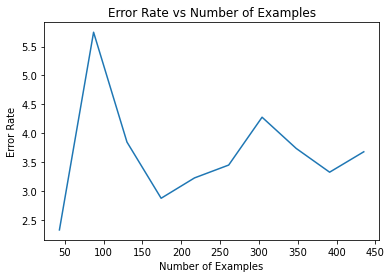

In [ ]:
from matplotlib import pyplot as plt
plt.plot(examples , subset_error_rates)
plt.xlabel("Number of Examples")
plt.ylabel("Error Rate")
plt.title('Error Rate vs Number of Examples')

Text(0.5, 1.0, 'Computational Time of Induction vs Number of Examples')

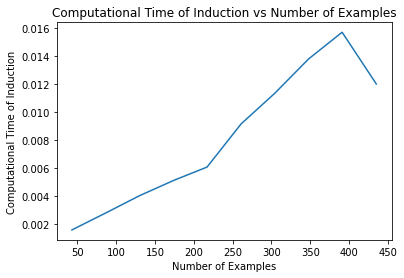

In [ ]:
plt.plot(examples , induction_times)
plt.xlabel("Number of Examples")
plt.ylabel("Computational Time of Induction")
plt.title('Computational Time of Induction vs Number of Examples')

# Mushrooms

## Load Data

In [ ]:
data = conv.load_any_file(os.environ.get("JAVA_HOME")+os.sep+"mushroom_data.csv")
#class location
data.class_is_first() 
#data.class_is_last()

### Configure Decision Tree Classifier

In [ ]:
# configure classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])

# cross-validate classifier
evl = Evaluation(data)
evl.crossvalidate_model(cls, data, 10, Random(1))

# output statistics
print(evl.summary("=== J48 on Mushrooms (stats) ===", False))
print(evl.matrix("=== J48 on Mushrooms (confusion matrix) ==="))
#print(evl.percent_correct)
#print(evl.percent_incorrect)

=== J48 on Mushrooms (stats) ===
Correctly Classified Instances        8416              100      %
Incorrectly Classified Instances         0                0      %
Kappa statistic                          1     
Mean absolute error                      0     
Root mean squared error                  0     
Relative absolute error                  0      %
Root relative squared error              0      %
Total Number of Instances             8416     

=== J48 on Mushrooms (confusion matrix) ===
    a    b   <-- classified as
 4488    0 |    a = EDIBLE
    0 3928 |    b = POISONOUS



### Configure Decision Tree Classifier on Subsets

In [ ]:
# generate subsets
num_of_instances = data.num_instances
num_of_subsets = 10
subset_accuracy_rates = []
subset_error_rates = []
induction_times = []
examples = []

for i in range(1,num_of_subsets + 1):
  subset_val = int((i/num_of_subsets) * num_of_instances)
  examples.append(subset_val)
  x = data.subset(row_range='first-%s'%subset_val)


  # configure classifier
  cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])

  # cross-validate classifier
  tic = time.perf_counter()
  evl = Evaluation(x)
  evl.crossvalidate_model(cls, x, 10, Random(1))
  tic = time.perf_counter() - tic

  # append subests and induction times
  subset_accuracy_rates.append(float(evl.percent_correct))
  subset_error_rates.append(float(evl.percent_incorrect))
  induction_times.append(tic)

  
print(subset_accuracy_rates)
print(subset_error_rates)
print(induction_times)
print(examples)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0038225150001380825, 0.012947163999342592, 0.019401458999709575, 0.020379588000650983, 0.05114017900086765, 0.03802790599911532, 0.06652514800043718, 0.09427563100143743, 0.09658060400033719, 0.11232079699948372]
[841, 1683, 2524, 3366, 4208, 5049, 5891, 6732, 7574, 8416]


### Plots

Text(0.5, 1.0, 'Error Rate vs Number of Examples')

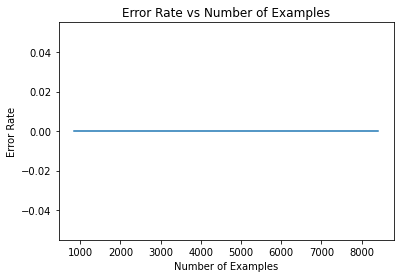

In [ ]:
from matplotlib import pyplot as plt
plt.plot(examples , subset_error_rates)
plt.xlabel("Number of Examples")
plt.ylabel("Error Rate")
plt.title('Error Rate vs Number of Examples')

Text(0.5, 1.0, 'Computational Time of Induction vs Number of Examples')

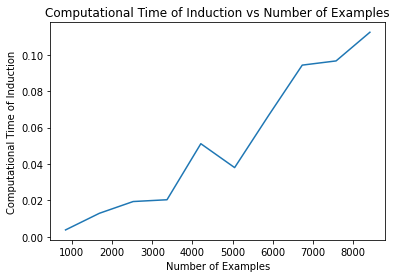

In [ ]:
plt.plot(examples , induction_times)
plt.xlabel("Number of Examples")
plt.ylabel("Computational Time of Induction")
plt.title('Computational Time of Induction vs Number of Examples')

## Dry Bean Data Set

### Load data

In [59]:
data = conv.load_any_file(os.environ.get("JAVA_HOME")+os.sep+"Dry_Bean_Dataset.csv")
#class location
#data.class_is_first() 
data.class_is_last()

### Configure Decision Tree Classifier

In [60]:
# configure classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])

# cross-validate classifier
evl = Evaluation(data)
evl.crossvalidate_model(cls, data, 10, Random(1))

# output statistics
print(evl.summary("=== J48 on Mushrooms (stats) ===", False))
print(evl.matrix("=== J48 on Mushrooms (confusion matrix) ==="))
#print(evl.percent_correct)
#print(evl.percent_incorrect)

=== J48 on Mushrooms (stats) ===
Correctly Classified Instances       12409               91.1756 %
Incorrectly Classified Instances      1201                8.8244 %
Kappa statistic                          0.8933
Mean absolute error                      0.0304
Root mean squared error                  0.1465
Relative absolute error                 12.8685 %
Root relative squared error             42.6329 %
Total Number of Instances            13610     

=== J48 on Mushrooms (confusion matrix) ===
    a    b    c    d    e    f    g   <-- classified as
 1891   13    0    4    0   57   61 |    a = SEKER
   12 1192    1   74   13   28    2 |    b = BARBUNYA
    0    1  520    1    0    0    0 |    c = BOMBAY
    4   71    0 1506   40    9    0 |    d = CALI
    0   12    0   32 1813   56   15 |    e = HOROZ
   42   19    0    9   58 2241  267 |    f = SIRA
   62    1    0    0   13  224 3246 |    g = DERMASON



### Configure Decision Tree Classifier on Subsets

In [61]:
# generate subsets
num_of_instances = data.num_instances
num_of_subsets = 10
subset_accuracy_rates = []
subset_error_rates = []
induction_times = []
examples = []

for i in range(1,num_of_subsets + 1):
  subset_val = int((i/num_of_subsets) * num_of_instances)
  examples.append(subset_val)
  x = data.subset(row_range='first-%s'%subset_val)


  # configure classifier
  cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])

  # cross-validate classifier
  tic = time.perf_counter()
  evl = Evaluation(x)
  evl.crossvalidate_model(cls, x, 10, Random(1))
  tic = time.perf_counter() - tic

  # append subests and induction times
  subset_accuracy_rates.append(float(evl.percent_correct))
  subset_error_rates.append(float(evl.percent_incorrect))
  induction_times.append(tic)

  
print(subset_accuracy_rates)
print(subset_error_rates)
print(induction_times)
print(examples)

[100.0, 98.64070536370316, 96.98750918442322, 96.1425422483468, 96.13519470977222, 95.16287043840313, 94.5418284874567, 94.4250551065393, 94.80773940729856, 91.1756061719324]
[0.0, 1.3592946362968406, 3.0124908155767818, 3.8574577516531963, 3.864805290227774, 4.837129561596865, 5.458171512543298, 5.574944893460691, 5.192260592701445, 8.824393828067597]
[0.003164362999086734, 0.30310427699805587, 0.5583163060000516, 1.0063301800000772, 1.524321863998921, 2.0464330470022105, 2.704930283998692, 3.3572598850005306, 3.6192025060008746, 4.494935668000835]
[1361, 2722, 4083, 5444, 6805, 8166, 9527, 10888, 12249, 13610]


### Plots

Text(0.5, 1.0, 'Error Rate vs Number of Examples')

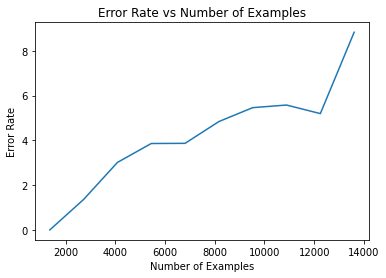

In [62]:
from matplotlib import pyplot as plt
plt.plot(examples , subset_error_rates)
plt.xlabel("Number of Examples")
plt.ylabel("Error Rate")
plt.title('Error Rate vs Number of Examples')

Text(0.5, 1.0, 'Computational Time of Induction vs Number of Examples')

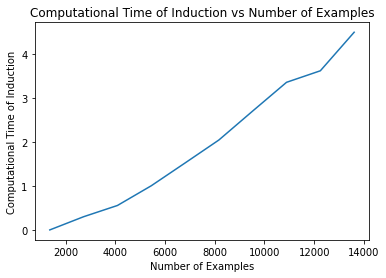

In [63]:
plt.plot(examples , induction_times)
plt.xlabel("Number of Examples")
plt.ylabel("Computational Time of Induction")
plt.title('Computational Time of Induction vs Number of Examples')

# End Session

In [ ]:
# stop jvm
# WARNING: JVM can only be run once. To re-run, click Runtime and Factory Reset Runtime
#jvm.stop()